# Market Event Detection 

- Author: Hao Ren
- Time: 2/4/2019

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

working_dir = os.getcwd()

## Approach 1

- Select a time window. This can be any one of these - 10, 30, 60 etc.

- Find the Returns for the window. (CP – OP) / OP and log returns for the window. Log(CP/OP)

- **in R script**: This will form the distribution. Fit an appropriate [distribution](https://stats.stackexchange.com/questions/132652/how-to-determine-which-distribution-fits-my-data-best), this can be any standard distribution like pareto, student t etc. estimate parameters.

- Determine if any observation is an outliers using standard deviation estimated from the distribution parameters.

>We need to explore different possibilities here to fine tune this. 1. The regimes of distribution may be different for ETH vs RTH (Extended vs Regular trading hours) 2.The regimes definitely can shift due to seasonality ( December vs June )

To sum it up this method is a traditional way of analysis, there are quite a few approximations here in terms of variability of the underlying asset, fit or misfit of the distribution etc. This is a very good start to explore and get a full understanding of the data and solution.



### Missing Value Processing
Generate all the minute timestamps between start date to end date(conducted in the CMCD_Modified.ipynb)

Open, High, Low, Close, TotalVolume : fill with previous valid value

Volume : fill with 0

In [42]:
all_data = pd.read_csv(working_dir+"/data/combined_data.csv", header=0, index_col=0, parse_dates=[0])
all_data[['Close','TotalVolume']] = all_data[['Close','TotalVolume']].fillna(method='ffill')
all_data['Volume'] = all_data['Volume'].fillna(value=0)
all_data=all_data.fillna(method="bfill", axis=1)

all_data.isnull().sum()

Open           0
High           0
Low            0
Close          0
TotalVolume    0
Volume         0
dtype: int64

### Split the trading period by day and night
- day_data: the trading data between 8:31 and 13:20
- night_data: the trading data between 19:01 and 7:45`

In [43]:
day_data = all_data.between_time("8:31", "13:20")
night_data = all_data.between_time("19:00", "7:45")
day_data.head()

,Open,High,Low,Close,TotalVolume,Volume
2016-01-04 08:31:00,358.25,358.50,357.75,357.75,10186.0,2193.0
2016-01-04 08:32:00,357.75,357.75,357.25,357.75,12454.0,2268.0
2016-01-04 08:33:00,357.75,357.75,357.00,357.25,13816.0,1362.0
2016-01-04 08:34:00,357.25,357.50,357.00,357.25,14783.0,967.0
2016-01-04 08:35:00,357.00,357.25,356.25,356.50,16697.0,1914.0


### Compute the Return

In [39]:
# Compute the return as Close Price - Open Price
for TIME_WINDOW in [4,5,6,7]:
    all_data['Return_'+str(TIME_WINDOW)] = all_data.Close-all_data.Open.shift(TIME_WINDOW-1)
    
# Compute the log return
for TIME_WINDOW in [4,5,6,7]:
    all_data['LogRet_'+str(TIME_WINDOW)] = all_data.Close.rolling(TIME_WINDOW).apply(lambda x: np.log(x[-1] / x[0]))
    
# Compute the RR = (High-Low)/Low
all_data['RR'] = (all_data.High-all_data.Low)/all_data.Low

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  import sys


In [40]:
all_data

,Open,High,Low,Close,TotalVolume,Volume,Return_4,Return_5,Return_6,Return_7,LogRet_4,LogRet_5,LogRet_6,LogRet_7,RR
2016-01-03 19:01:00,359.50,360.00,359.00,359.75,1215.0,1215.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002786
2016-01-03 19:02:00,359.75,359.75,359.25,359.50,1715.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001392
2016-01-03 19:03:00,359.50,359.50,359.00,359.00,2059.0,344.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001393
2016-01-03 19:04:00,359.00,359.25,359.00,359.00,2077.0,18.0,-0.50,NaN,NaN,NaN,-0.002087,NaN,NaN,NaN,0.000696
2016-01-03 19:05:00,359.00,359.00,359.00,359.00,2119.0,42.0,-0.75,-0.50,NaN,NaN,-0.001392,-0.002087,NaN,NaN,0.000000
2016-01-03 19:06:00,359.25,359.25,359.00,359.25,2129.0,10.0,-0.25,-0.50,-0.25,NaN,0.000696,-0.000696,-0.001391,NaN,0.000696
2016-01-03 19:07:00,359.00,359.25,358.75,359.00,2231.0,102.0,0.00,-0.50,-0.75,-0.50,0.000000,0.000000,-0.001392,-0.002087,0.001394
2016-01-03 19:08:00,359.00,359.00,358.75,358.75,2317.0,86.0,-0.25,-0.25,-0.75,-1.00,-0.000697,-0.000697,-0.000697,-0.002088,0.000697
2016-01-03 19:09:00,358.75,359.00,358.75,359.00,2330.0,13.0,-0.25,0.00,0.00,-0.50,-0.000696,0.000000,0.000000,0.000000,0.000697
2016-01-03 19:10:00,359.00,359.00,358.75,359.00,2400.0,70.0,0.00,-0.25,0.00,0.00,0.000000,-0.000696,0.000000,0.000000,0.000697


In [44]:
# Compute the return as Close Price - Open Price
for TIME_WINDOW in [4,5,6,7]:
    day_data['Return_'+str(TIME_WINDOW)] = day_data.Close-day_data.Open.shift(TIME_WINDOW-1)
    
# Compute the log return
for TIME_WINDOW in [4,5,6,7]:
    day_data['LogRet_'+str(TIME_WINDOW)] = day_data.Close.rolling(TIME_WINDOW).apply(lambda x: np.log(x[-1] / x[0]))
    
# Compute the RR = (High-Low)/Low
day_data['RR'] = (day_data.High-day_data.Low)/day_data.Low

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  import sys
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [45]:
day_data

,Open,High,Low,Close,TotalVolume,Volume,Return_4,Return_5,Return_6,Return_7,LogRet_4,LogRet_5,LogRet_6,LogRet_7,RR
2016-01-04 08:31:00,358.25,358.50,357.75,357.75,10186.0,2193.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002096
2016-01-04 08:32:00,357.75,357.75,357.25,357.75,12454.0,2268.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001400
2016-01-04 08:33:00,357.75,357.75,357.00,357.25,13816.0,1362.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002101
2016-01-04 08:34:00,357.25,357.50,357.00,357.25,14783.0,967.0,-1.00,NaN,NaN,NaN,-0.001399,NaN,NaN,NaN,0.001401
2016-01-04 08:35:00,357.00,357.25,356.25,356.50,16697.0,1914.0,-1.25,-1.75,NaN,NaN,-0.003500,-0.003500,NaN,NaN,0.002807
2016-01-04 08:36:00,356.50,356.75,356.50,356.50,17150.0,453.0,-1.25,-1.25,-1.75,NaN,-0.002102,-0.003500,-0.003500,NaN,0.000701
2016-01-04 08:37:00,356.75,357.00,356.50,356.75,17549.0,399.0,-0.50,-1.00,-1.00,-1.50,-0.001401,-0.001401,-0.002799,-0.002799,0.001403
2016-01-04 08:38:00,356.75,357.50,356.75,357.50,18456.0,907.0,0.50,0.25,-0.25,-0.25,0.002801,0.000700,0.000700,-0.000699,0.002102
2016-01-04 08:39:00,357.25,357.50,357.00,357.00,19156.0,700.0,0.50,0.00,-0.25,-0.75,0.001402,0.001402,-0.000700,-0.000700,0.001401
2016-01-04 08:40:00,357.00,357.75,357.00,357.75,19653.0,497.0,1.00,1.25,0.75,0.50,0.002799,0.003500,0.003500,0.001399,0.002101


In [46]:
# Save the data to csv 
day_data.to_csv("./data/day_data.csv")
night_data.to_csv("./data/night_data.csv")

In [47]:
all_data.to_csv(working_dir+"/data/return_data.csv")
# Use R to do some EDA on the distribution based on the reference

### Find a distribution

Empirical Distribution

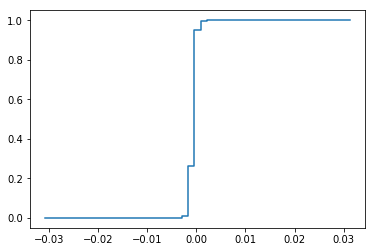

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def ecdf(sample):
    import statsmodels.api as sm 
    
    ecdf = sm.distributions.ECDF(sample)
    x = np.linspace(min(sample), max(sample))
    y = ecdf(x)
    plt.step(x, y)
    plt.show()
    
ecdf(day_data.Return_60)